## Broad Question
What player behaviours and qualities are the most predictive to know if a user is subscribed to the news letter?

## Specific Question
"Can a player's total play time (played_hours) and experience level (experience) predit whether they subscribe to the newsletter (subscribe)?"

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
player_data<-read_csv("players.csv")|>
    mutate(experience=as_factor(experience))
player_data

session_data<-read_csv("sessions.csv")




Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
dim<-print(dim(player_data))
dim

player_summ<-player_data|>
    select(where(is.numeric))|>
    pivot_longer(cols=everything(),names_to="Variable",values_to="Value")|>
    group_by(Variable)|>
    summarise(
        Mean=mean(Value,na.rm=TRUE),
        Median=median(Value,na.rm=TRUE),
        Min=min(Value,na.rm=TRUE),
        Max=max(Value,na.rm=TRUE))
player_summ

[1] 196   7


[1] 196   7

Variable,Mean,Median,Min,Max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,21.139175,19.0,9,58.0
played_hours,5.845918,0.1,0,223.1


## Data Description
The data recorded in both the players.csv and sessions.csv data sets include information about users playing on a customized UBC minecraft server. Research was conducted by Dr. Frank Wood and looks at player demographics, experience level, and behaviour in game. 

Players data set has 196 obervations with 7 variables. 

Sessons data set have 176 observations with 3 variables. I am not using this data set so it has not been included below.

Below is a summary of all the variables:

|Variable|Type|Description|
|--------|----|-----------|
|experience|chr|Self evaluations of experience level by users|
|subscribe|lgl|Either a true/false answer to whether someone is subscribed to the newsletter|
|hashedEmail|chr|Allows users to participate without giving personal data to other readers|
|played_hours|dbl|total hours played overall|
|name|chr|name of the users|
|gender|chr|Indicates whether users are male or female|
|Age|dbl|Age of the users|

Data was collected by loging in game movements and activity when on the server, and by registration forms online. 

Some potential issues include missing data from one data set to another, self declared data makes the classifications not as accurate, and some data/values are missing for certain users. 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


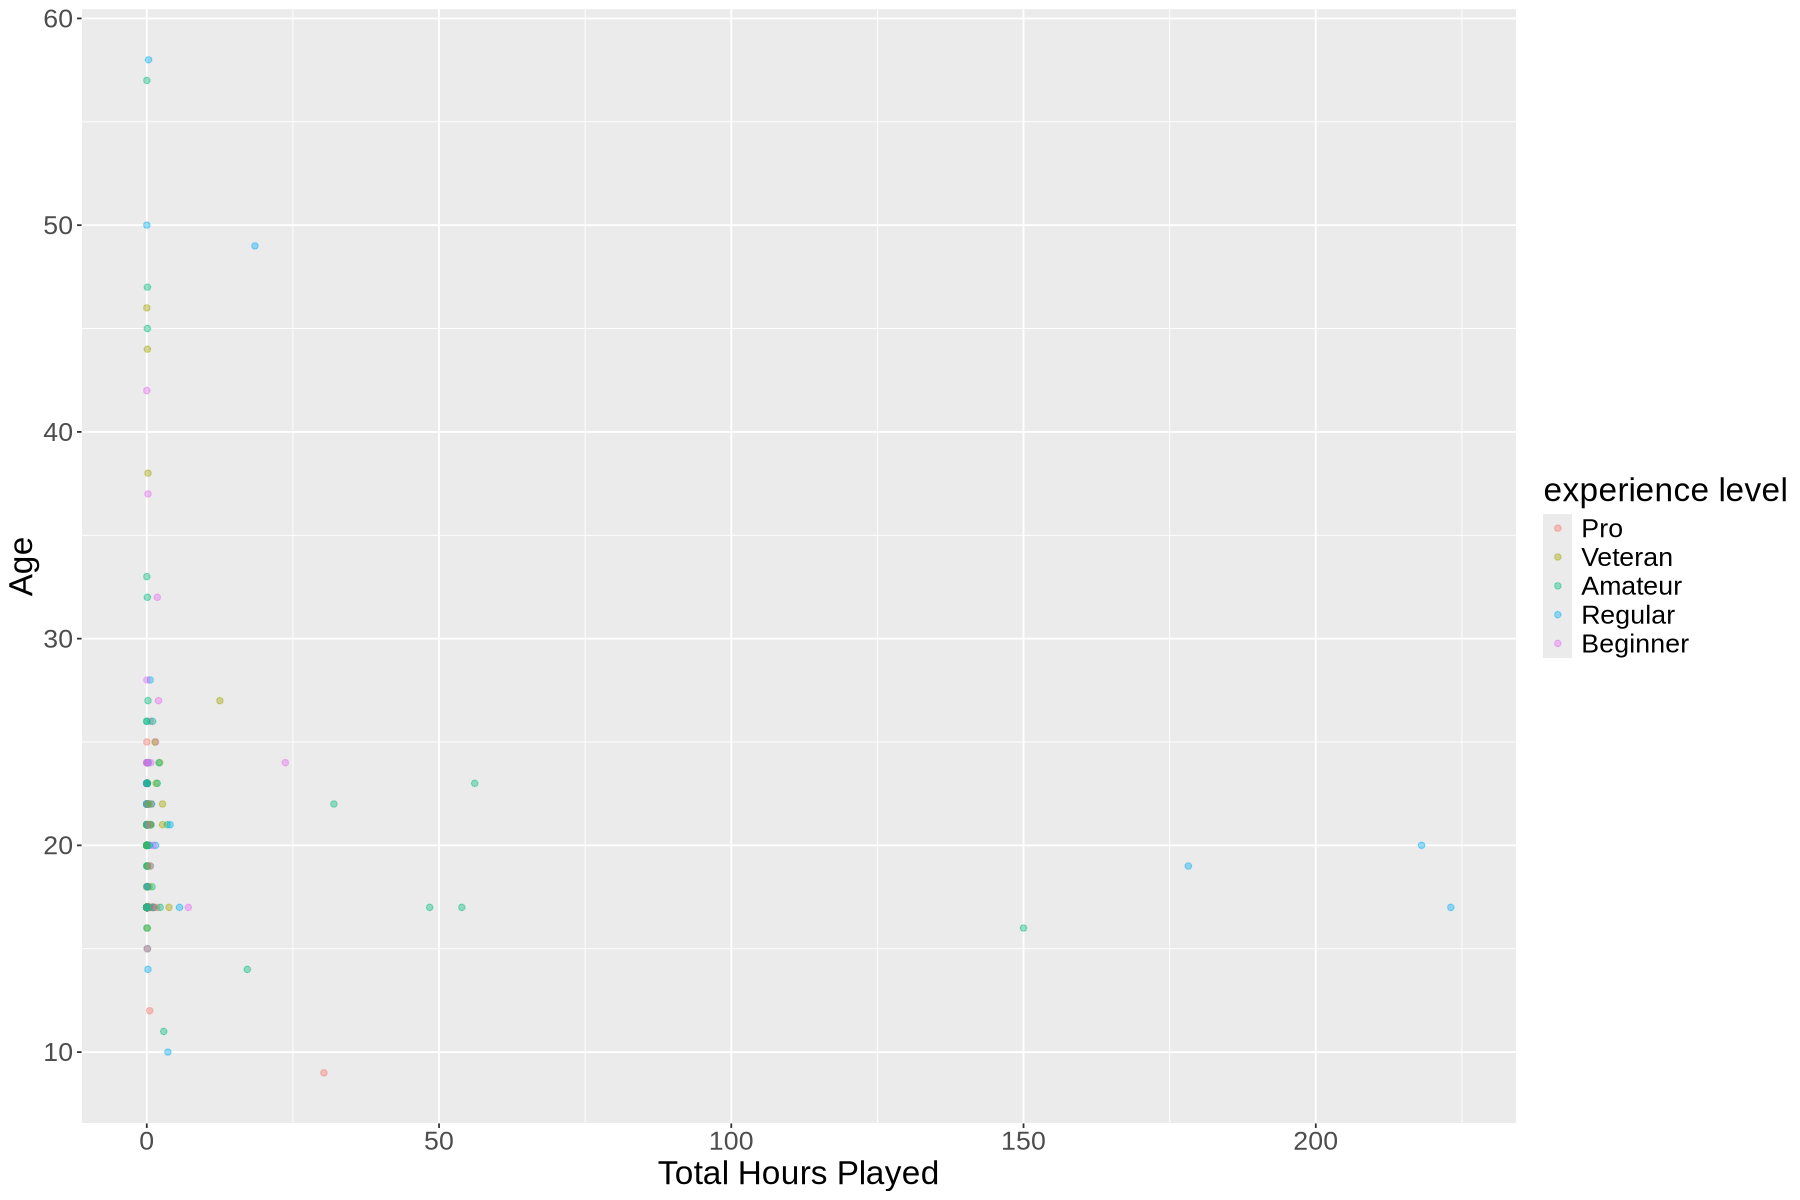

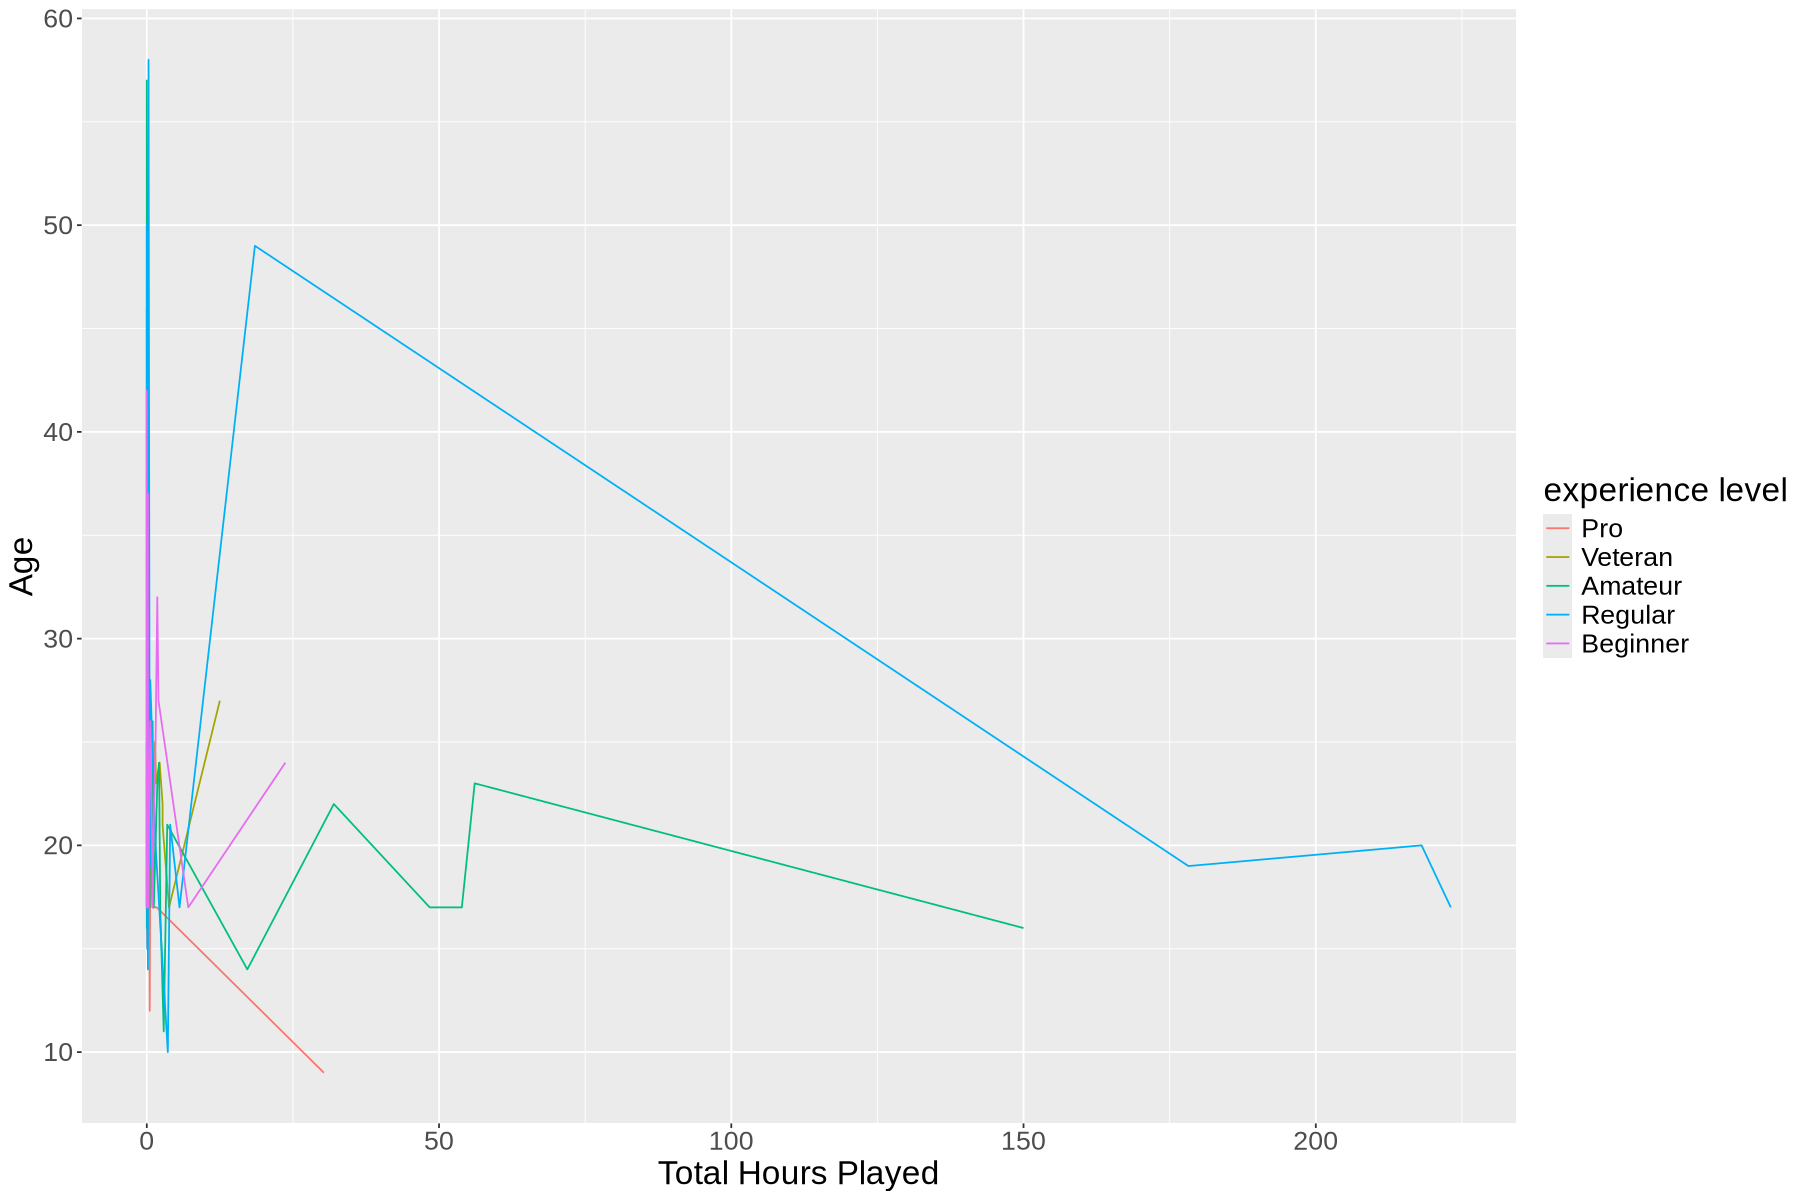

In [4]:
data<-player_data|>
    select(played_hours,Age,experience)

options(repr.plot.width=15,repr.plot.height=10)

player_vis<-data|>
    ggplot(aes(y=Age,x=played_hours,colour=experience))+
    geom_point(alpha=0.4)+
    labs(y="Age",x="Total Hours Played",colour="experience level")+
    theme(text = element_text(size = 20))
player_vis

player_vis_2<-data|>
    ggplot(aes(y=Age,x=played_hours,colour=experience))+
    geom_line()+
    labs(y="Age",x="Total Hours Played",colour="experience level")+
    theme(text = element_text(size = 20))
player_vis_2

In [5]:
data<-player_data|>drop_na(Age,played_hours)

set.seed(1)

player_split<-initial_split(data,prop=0.75,strata=experience)

player_test<-testing(player_split)

player_train<-training(player_split)

player_vfold<-vfold_cv(player_train,v=5,strata=experience)
player_vfold

player_vals<-tibble(neighbors=seq(from=1,to=100,by=5))

player_recipe<-recipe(experience~Age+played_hours,data=player_train)|>
    step_center(all_predictors())|>
    step_scale(all_predictors())
player_recipe

player_spec<-nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
    set_engine("kknn")|>
    set_mode("classification")
player_spec

player_workflow<-workflow()|>
    add_recipe(player_recipe)|>
    add_model(player_spec)
player_workflow

player_tune<-tune_grid(player_workflow,resamples=player_vfold,metrics=metric_set(accuracy))

player_fit<-player_tune|>
    collect_metrics()|>
    arrange(desc(mean))
player_fit

Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
ERROR while rich displaying an object: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 114, 115, 117

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NUL

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.3113921,5,0.03686427,Preprocessor1_Model01
7,accuracy,multiclass,0.2838059,5,0.03074667,Preprocessor1_Model05
3,accuracy,multiclass,0.2837548,5,0.03146049,Preprocessor1_Model02
14,accuracy,multiclass,0.2709323,5,0.01662831,Preprocessor1_Model10
6,accuracy,multiclass,0.2690421,5,0.04298509,Preprocessor1_Model04
11,accuracy,multiclass,0.2630651,5,0.02072000,Preprocessor1_Model08
10,accuracy,multiclass,0.2623244,5,0.02876995,Preprocessor1_Model07
13,accuracy,multiclass,0.2571392,5,0.01396209,Preprocessor1_Model09
9,accuracy,multiclass,0.2561686,5,0.02080273,Preprocessor1_Model06


In [6]:
best_k<-player_tune|>
    select_best(metric="accuracy")

final_knn<-finalize_workflow(player_workflow,best_k)
final_knn

final_fit<-fit(final_knn,data=player_train)
final_fit

player_predict<-predict(final_fit,new_data=player_test)|>
    bind_cols(player_test)
player_predict

player_metrics<-player_predict|>
    metrics(truth=experience,estimate=.pred_class)
player_metrics


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 2
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2L,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.6666667
Best kernel: rectangular
Best k: 2

.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Amateur,Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Veteran,Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47
Amateur,Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Amateur,Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17
Amateur,Veteran,TRUE,6f9acf8ea9956fe817895c78d10e1e25c11aba335a451e5b0322b073ee5008c4,0.0,Niamh,Non-binary,17
Amateur,Beginner,TRUE,9db37a1d381697f6c83e3b97b276e38bb9d9c811ba4596edb75d4dbfea6415b0,0.0,Elodie,Female,17
Amateur,Beginner,TRUE,89c8e07d6a2aa102d9cd05086d51b2e41195c9c807dd976a06f4262ff36d0cca,0.0,Ren,Male,17


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.28000000
kap,multiclass,0.01153213


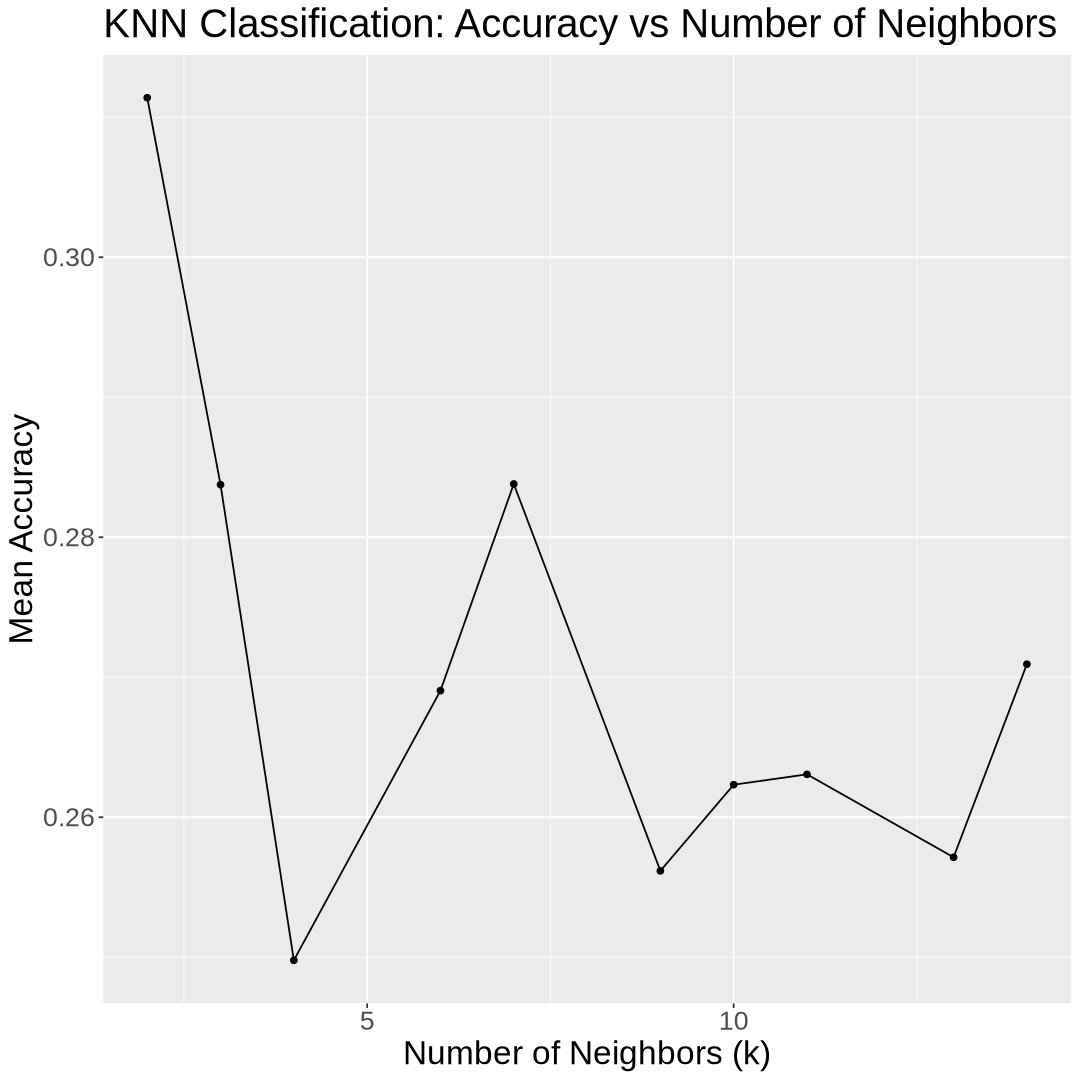

In [7]:
options(repr.plot.width=9,repr.plot.height=9)

player_plot<-player_fit|>
    ggplot(aes(x=neighbors,y=mean))+
    geom_line()+
    geom_point()+
    labs(title="KNN Classification: Accuracy vs Number of Neighbors",
         x="Number of Neighbors (k)",
         y="Mean Accuracy")+
    theme(text=element_text(size=20))
player_plot

## Methods and Plan
I used KNN classification to predict player experience level based on their age and total hours played. I used KNN because it assigns class labels based on the majority amount the k closest data points near the predicted space. This was appropriate because the data was not linear, and KNN was able to provide a simple/interpretive model. An assumption made was that the distance between points reflects similarity after being scaled. A limitation is that the experience 'values' were self given, so it is not an accurate representation of someones actual experience level.

1.Data was split - 75% training, 25% testing, stratified by experience
2.Centered and scaled all predictors (Age, played_hours)
3.Used 5-fold cross validation on training data
4.Choose k that maximized mean cross-validated accuracy
5.Tuned the model with the test data as well.

The purpose of this analysis was to predict a players experience level using age and total hours played as predictors. This can give us insight on how demographic and activity factors correlate to a users percieved skill level. Future studies could look at more predictors (rank, session length) to get more accurate classification models. 

## GitHub Repository
